## Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [2]:
#impoting required library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Fetching the training data and testing data

df_train = pd.read_csv('bigdatamart_Train.csv')
df_test  = pd.read_csv('bigdatamart_Test.csv')

df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# testing data

df_test.head()

#Observation
#testing data don't have target variable

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
# Size of data
df_train.shape

(8523, 12)

In [6]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
Number_of_Store = df_train['Outlet_Identifier'].unique()
Number_of_Store

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
# Using above dataser we get to know model we need to build in Multiple Linear Regression

## Checking null value

<AxesSubplot:>

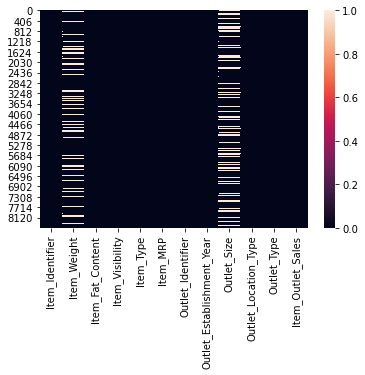

In [9]:
#Training Data
sns.heatmap(df_train.isnull())

<AxesSubplot:>

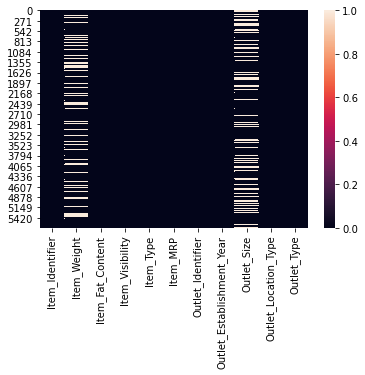

In [10]:
# Testing Data
sns.heatmap(df_test.isnull())

## Observation
    1.Training and testing data Item_Weight and Outlet_Size having more null values we need to handle 


## Data Description

        1. Item_Identifier - Unique identifier for each product.
        2. Item_Weight – Product weight.
        3. Item_Fat_Content – Fat content of the product.
        4. Item_Visibility – Percentage of total display area in a store allocated to the product.
        5. Item_Type – Product category.
        6. Item_MRP – List price of the product.
        7. Outlet_Identifier - Unique identifier for each store..
        8. Outlet_Establishment_Year – Establishment year for each store.
        9. Outlet_Size - The size of the store.
        10. Outlet_Location_Type - The type of city in which the store is located.
        11. Outlet_Type - Whether the store is a grocery store or a supermarket.
        12. Item_Outlet_Sales - Sales of the product in each store.

In [12]:
df_train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

## Statistical Summary

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


### Observation :
    1.Range of Item_Outlet_Sales is 13086 - 33 = 13053

## Univariant Analysis

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

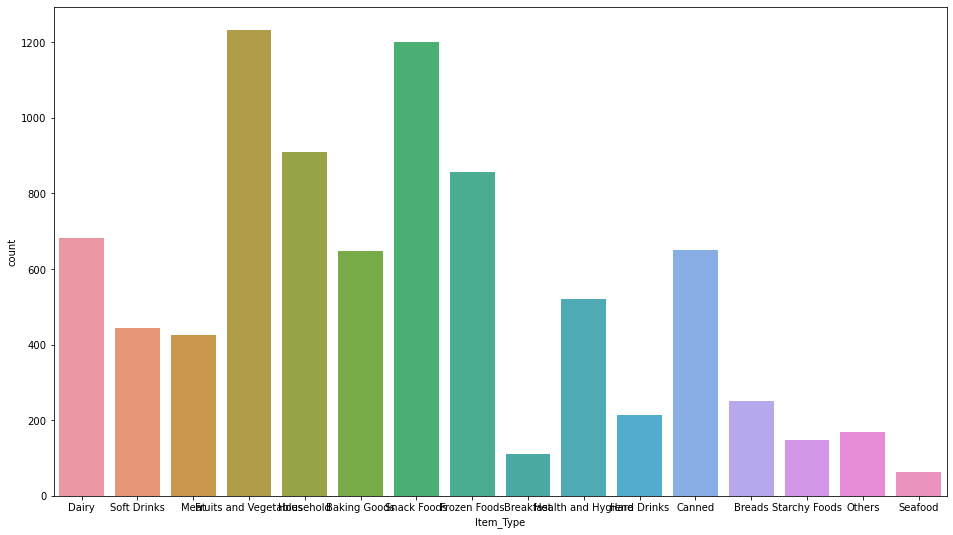

In [14]:
plt.figure(figsize=(16,9))
sns.countplot(df_train.Item_Type)

In [15]:
# Checking which product is selling more
df_train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

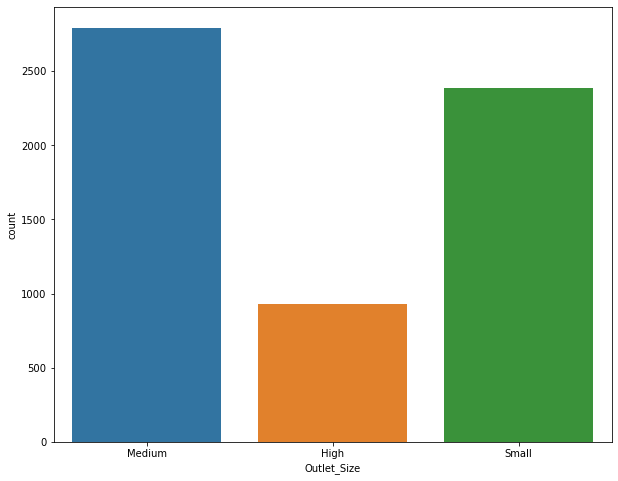

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(df_train.Outlet_Size)

In [17]:
# Observation
    # Medium outlets or more selling the item.

In [18]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [20]:
df_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content'>

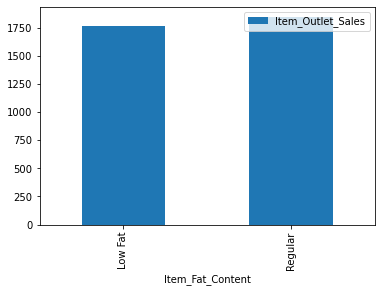

In [21]:
Item_pivot_table = df_train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)
Item_pivot_table.plot(kind='bar')

<AxesSubplot:>

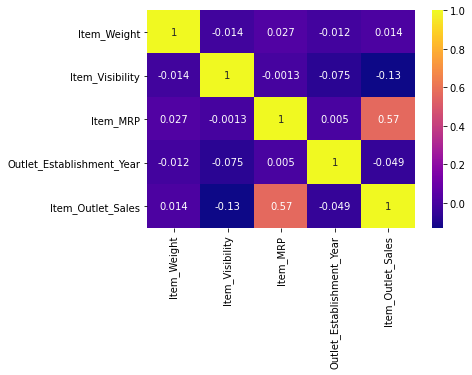

In [22]:
sns.heatmap(df_train.corr(),cmap='plasma',annot=True)

In [24]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)

In [25]:
df_train['Outlet_Size'].fillna('Medium',inplace=True)

In [26]:
# Null Value is cleared 
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
# Converting all categorical variable to numerical variable using label encoder

variable = ['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

for i in variable:
    df_train[i] = le.fit_transform(df_train[i])
    
df_train    

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,NCD19,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [44]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   int32  
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   int32  
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   int32  
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int32(3), int64(1), object(4)
memory usage: 421.8+ KB


In [43]:
variable = ['Outlet_Size','Outlet_Location_Type','Outlet_Type']
    
for i in variable:
    df_test[i] = le.fit_transform(df_test[i])
    
df_test    

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(4), int64(3), object(1)
memory usage: 666.0+ KB


## Model Building

In [36]:
x_train =df_train.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
y_train =df_train['Item_Outlet_Sales']
x_test =df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1)

### Linear Regression :


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
lr = LinearRegression()

lr.fit(x_train,y_train)
y_prec = lr.predict(x_test)

ValueError: could not convert string to float: 'Low Fat'